# Calculating simple financial formulas 
- Pct change
- Log returns
- Standard deviation (Volatility)

### Standard deviation

**_daily volatility_** = $\sqrt{variance}$ **or**  $\sigma_{}$ 

**_anualized volatility_** = $\sqrt{variance}$ x $\sqrt{252}$

  *(252 trading days per year)*

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define Start/End dates, and ticker names
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021,12,31)

In [3]:
# Getting data for Uber & Lyft
Uber = data.DataReader("UBER", 'yahoo', start, end)
Lyft = data.DataReader("LYFT", 'yahoo', start, end)

In [4]:
Uber.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,52.320000,49.634998,52.220001,51.139999,17291800,51.139999
2021-01-05,54.189999,50.759998,51.000000,54.009998,21403200,54.009998
2021-01-06,54.070000,52.000000,53.310001,52.480000,17738100,52.480000
2021-01-07,56.250000,53.200001,53.369999,56.130001,23737500,56.130001
2021-01-08,54.790001,52.580002,54.395000,53.279999,37999400,53.279999


In [5]:
Uber['%-chg'] = Uber['Close'].pct_change()
Lyft['%-chg'] = Lyft['Close'].pct_change()

In [6]:
Uber.head()

,High,Low,Open,Close,Volume,Adj Close,%-chg
Date,,,,,,,
2021-01-04,52.320000,49.634998,52.220001,51.139999,17291800,51.139999,NaN
2021-01-05,54.189999,50.759998,51.000000,54.009998,21403200,54.009998,0.056120
2021-01-06,54.070000,52.000000,53.310001,52.480000,17738100,52.480000,-0.028328
2021-01-07,56.250000,53.200001,53.369999,56.130001,23737500,56.130001,0.069550
2021-01-08,54.790001,52.580002,54.395000,53.279999,37999400,53.279999,-0.050775


In [7]:
Uber['Log returns'] = np.log(Uber['Close']/Uber['Close'].shift())
Lyft['Log returns'] = np.log(Lyft['Close']/Lyft['Close'].shift())

In [8]:
Lyft.tail()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log returns
Date,,,,,,,,
2021-12-27,44.564999,43.220001,43.939999,44.029999,3966800,44.029999,-0.003395,-0.003401
2021-12-28,44.660000,43.035000,43.779999,43.520000,3401100,43.520000,-0.011583,-0.011651
2021-12-29,43.619999,42.200001,43.430000,43.240002,3147200,43.240002,-0.006434,-0.006455
2021-12-30,44.349998,42.540001,42.540001,43.490002,3436600,43.490002,0.005782,0.005765
2021-12-31,44.087002,42.639999,43.320000,42.730000,3235300,42.730000,-0.017475,-0.017630


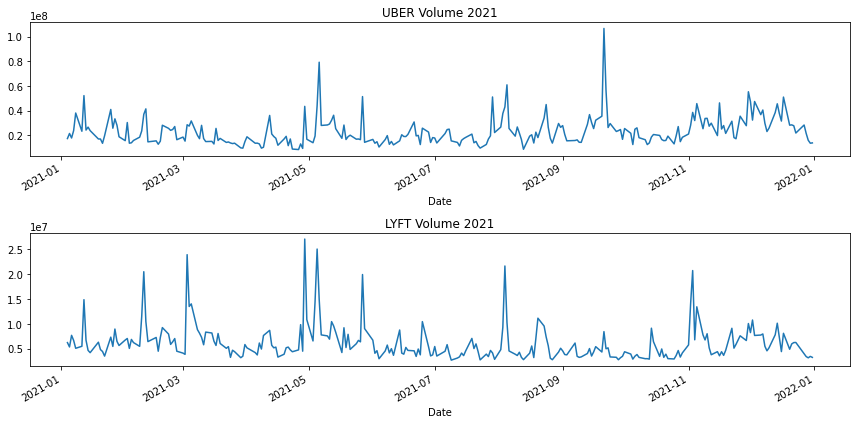

In [9]:
fig, ax = plt.subplots(2)
Uber['Volume'].loc['2021-01-01':].plot(ax=ax[0], title="UBER Volume 2021", figsize=(12,6))
Lyft['Volume'].loc['2021-01-01':].plot(ax=ax[1], title="LYFT Volume 2021", figsize=(12,6))

fig.tight_layout()

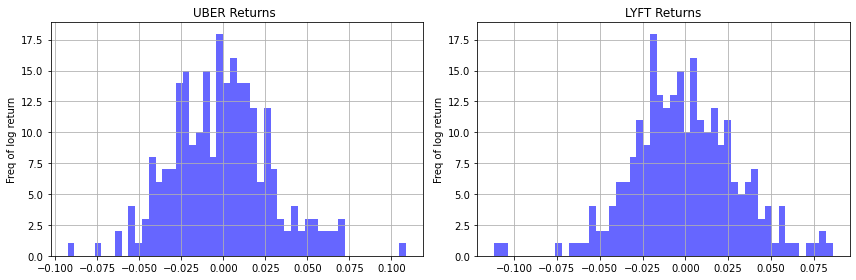

In [10]:
fig, ax = plt.subplots(1,2)
Uber['Log returns'].hist(ax=ax[0], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[0].set_ylabel("Freq of log return")
ax[0].set_title("UBER Returns ")

# Lyft Returns
Lyft['Log returns'].hist(ax=ax[1], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[1].set_ylabel("Freq of log return")
ax[1].set_title("LYFT Returns")

fig.tight_layout()


In [11]:
Uber['Log returns'].std()

0.029325677800233426

In [12]:
Lyft['Log returns'].std()

0.03028537583283654

In [13]:
Uber_volatility = Uber['Log returns'].std()*np.sqrt(252)

In [14]:
Uber_volatility

0.4655307029269521

In [15]:
Lyft_volatility = Lyft['Log returns'].std()*np.sqrt(252)

In [16]:
Lyft_volatility

0.4807654368948669